# 課題: 訪日外客数の分析
> 訪日外客数と為替相場のデータを加工し、グラフを作ります。
---

In [43]:
from adjustText import adjust_text
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [44]:
# グラフのスタイル設定（実務の時はお好みでどうぞ）
# ちなみにggplotはRの可視化ライブラリで、matplotlibよりも使いやすいという評判
plt.style.use('ggplot')

## データ読み込み

### 訪日外客数

In [45]:
path = "https://www.soumu.go.jp/johotsusintokei/whitepaper/ja/h28/csv/n3401030.csv"
tourists_wide = pd.read_csv(path, encoding='sjis')

In [46]:
tourists_wide.head(15)

,@Caption,訪日外客数の動向,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,@Creator,平成28年版情報通信白書,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,@Date,2016-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@Language,ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,@@Title,ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
5,@@Unit,ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,人,人,人,人,人,人,人,人,人,人,人,人,人
7,@@Baseval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,@@Datatype,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 為替相場

In [47]:
path = "https://www.mizuhobank.co.jp/market/quote.csv"
exrate_wide = pd.read_csv(path, encoding='sjis')

In [48]:
exrate_wide.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,参考相場,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,米ドル,英ポンド,ユーロ,カナダドル,スイスフラン,スウェーデンクローネ,デンマーククローネ,ノルウェークローネ,オーストラリアドル,...,チェココロナ,ポーランドズロチ,トルコリラ,NaN,インドネシアルピア,中国人民元,マレーシアリンギ,韓国ウォン,台湾ドル,ロシアルーブル
1,NaN,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,...,CZK,PLN,TRY,NaN,IDR(100),CNY,MYR,KRW(100),TWD,RUB
2,2002/4/1,133.15,189.79,116.12,83.48,79.28,12.87,15.63,15.08,71.14,...,*****,*****,NaN,NaN,1.37,16.09,*****,*****,3.82,NaN
3,2002/4/2,133.2,191.78,117.18,83.38,80.15,13,15.77,15.24,71.02,...,*****,*****,NaN,NaN,1.38,16.09,*****,*****,3.82,NaN
4,2002/4/3,133.2,191.26,116.96,83.65,80.02,12.95,15.75,15.23,71.14,...,*****,*****,NaN,NaN,1.37,16.09,*****,*****,3.82,NaN


## データ整形

### 訪日外客数

In [49]:
# カラム定義と不要な行の削除
tourists_wide.columns = pd.Series(tourists_wide.iloc[4].values).fillna('国名')
tourists_wide = tourists_wide.iloc[11:].reset_index(drop=True)

In [50]:
# 重複して集計されている項目を削除
others = tourists_wide['国名'][tourists_wide['国名'].str.endswith('その他')]
remove_cols = [o[:-3]+'計' for o in others]
remove_cols.append('総数')

is_tgt = ~tourists_wide['国名'].isin(remove_cols)
tourists_wide = tourists_wide[is_tgt].set_index('国名').astype(int).reset_index()

In [51]:
tourists_wide.head()

,国名,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,韓国,1459333,1588472,1747171,2117325,2600694,2382397,1586772,2439816,1658073,2042775,2456165,2755313,4002095
1,中国,448782,616009,652820,811675,942439,1000416,1006085,1412875,1043246,1425100,1314437,2409158,4993689
2,台湾,785379,1080590,1274612,1309121,1385255,1390228,1024292,1268278,993974,1465753,2210821,2829821,3677075
3,香港,260214,300246,298810,352265,432042,550190,449568,508691,364865,481665,745881,925975,1524292
4,アジアその他,557805,622778,654065,656739,769853,830596,747284,898772,663503,972684,1388485,1898944,2445267


#### 縦持ちデータを作成

In [52]:
tourists = tourists_wide.melt(
    id_vars='国名', 
    var_name='年',
    value_name='訪日外客数',
    value_vars=tourists_wide.columns[1:]
    )

In [53]:
# 型変換
tourists = tourists.astype({'年': int})

In [54]:
# プロットする国の順序を定義
sorted_countries = tourists.groupby('国名')['訪日外客数'].sum().reset_index().sort_values('訪日外客数', ascending=False)['国名']

In [55]:
# 横持ちを並び替え
tourists_wide = tourists_wide.set_index('国名').loc[sorted_countries].reset_index()

In [56]:
tourists.head()

,国名,年,訪日外客数
0,韓国,2003,1459333
1,中国,2003,448782
2,台湾,2003,785379
3,香港,2003,260214
4,アジアその他,2003,557805


###  為替相場

In [57]:
# 国名と通貨を結合する
columns_head = [str(c) for c in exrate_wide.iloc[0, :]]
columns_tail = [str(c) for c in exrate_wide.iloc[1, :]]
columns = [('_').join([c1, c2]) for c1, c2 in zip(columns_head, columns_tail)]
# 年月日は書き換え
columns[0] = '年月日'
# カラムを上書き
exrate_wide.columns = columns

In [58]:
# 年月日をdatetimeに変更
exrate_wide['年月日'] = pd.to_datetime(exrate_wide['年月日'], format='%Y/%m/%d')
# 余分な行削除
exrate_wide = exrate_wide.iloc[2:, :]

In [59]:
# 加工しづらいので縦持ちに変換
exrate = exrate_wide.melt(
    id_vars='年月日', 
    var_name='通貨',
    value_name='為替相場'
).query('通貨!="nan_nan" & 年月日 <= "2016-12-31"').sort_values(['年月日', '通貨']).reset_index(drop=True)

In [60]:
# 変な文字をnanにしてfloatに変更
exrate['為替相場'] = exrate['為替相場'].replace('*****', 0).fillna(0).astype(float)

In [61]:
# 為替相場をリスト化
_ = exrate.groupby(['年月日', '通貨'])['為替相場']\
    .apply(lambda x: {l for l in x if l!=0}).reset_index(name='為替相場s')

In [62]:
# 0以上の値が一意に決まるか調べる
_['value_num'] = _['為替相場s'].apply(lambda x: len(x))
assert _['value_num'].max()==1

In [63]:
# 為替相場をリスト化
exrate = exrate.groupby(['年月日', '通貨'])['為替相場']\
    .apply(lambda x: max(x)).reset_index()

In [64]:
# 0をnanにする
exrate['為替相場'].replace(0, np.nan, inplace=True)

In [65]:
# 移動平均を計算
exrate = exrate.sort_values(['通貨', '年月日']).reset_index(drop=True)
exrate['為替相場_365日移動平均'] = list(exrate.groupby(['通貨', '年月日'])['為替相場'].rolling(365).mean())

In [66]:
# 年間集計
exrate_year = exrate.copy()
exrate_year['年'] = exrate['年月日'].dt.year
exrate_year = exrate_year.groupby(['通貨', '年'])['為替相場'].mean().reset_index()

In [67]:
# 結合キー作成
exrate_year['国名'] = np.nan
exrate_year['国名'] = exrate_year['国名'].mask(
    exrate_year['通貨']=='米ドル_USD', '米国'
).mask(
    exrate_year['通貨']=='中国人民元_CNY', '中国'
).mask(
    exrate_year['通貨']=='韓国ウォン_KRW(100)', '韓国'
)

In [68]:
exrate_year.head()

,通貨,年,為替相場,国名
0,UAEディルハム_AED,2002,33.473989,NaN
1,UAEディルハム_AED,2003,31.589878,NaN
2,UAEディルハム_AED,2004,29.472927,NaN
3,UAEディルハム_AED,2005,30.030408,NaN
4,UAEディルハム_AED,2006,31.701855,NaN


### 訪日外客数に為替相場をマージ

In [69]:
tourists_exrate = tourists.merge(exrate_year, on=['国名', '年'], how='left').dropna(how='any')

In [70]:
tourists_exrate.head()

,国名,年,訪日外客数,通貨,為替相場
0,韓国,2003,1459333,韓国ウォン_KRW(100),9.741469
1,中国,2003,448782,中国人民元_CNY,14.014449
10,米国,2003,655821,米ドル_USD,115.996327
16,韓国,2004,1588472,韓国ウォン_KRW(100),9.459797
17,中国,2004,616009,中国人民元_CNY,13.075894


## 可視化

In [71]:
# よく使うオプションを変数化
legend_option1 = dict(bbox_to_anchor=(1.05, 1), loc='upper left')
legend_option2 = dict(bbox_to_anchor=(1.05, 0.9), loc='upper left')

In [72]:
# 100万をMにするformatter
def formatter(x, pos):
    return str(round(x / 1e6, 1)) + "M"
def pformatter(x, pos):
    return str(int(x*100)) + "%"

### ヒートマップ

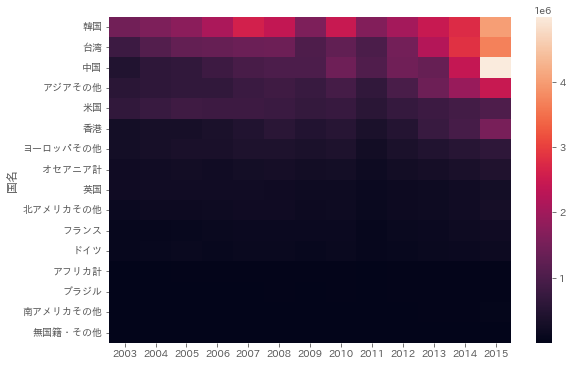

In [73]:
fig = plt.figure(figsize=(9, 6))
sns.heatmap(
    tourists_wide.set_index('国名').astype(int),
    xticklabels=tourists_wide.columns[1:]
)
plt.show()

In [74]:
# 成長率を計算
base_yeer = tourists['年'].min()
guests = '訪日外客数'
c_base = f'{base_yeer}年の{guests}'
growth = f'{c_base}基準の成長率'

tourists = tourists.merge(
    tourists.query(f'年=={base_yeer}').rename(columns={guests: c_base}).drop('年', axis=1),
    on='国名',
    how='left'
)
tourists[growth] = tourists[guests] / tourists[c_base]

In [75]:
# 集計値作成
tourists['年間訪日外客数'] = tourists.groupby('年')['訪日外客数'].transform('sum')
tourists['年間訪日外客数に占める割合'] = tourists['訪日外客数'] / tourists['年間訪日外客数']

In [76]:
# 積み上げ用のデータ作成
num_stacks = []
ratio_stacks = []
for country in sorted_countries:
    num_stacks.append(tourists[tourists['国名']==country]['訪日外客数'])
    ratio_stacks.append(tourists[tourists['国名']==country]['年間訪日外客数に占める割合'])

### エリアチャート（合計）

In [77]:
def plt_stack(x, y, stacks, ymax=None):
    fig = plt.figure(figsize=(9, 6))
    ax1 = fig.add_subplot(1, 1, 1)
    plt.title(y)
    plt.stackplot(tourists[x].unique(), *stacks, labels=sorted_countries)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xlim(tourists[x].min(), tourists[x].max())
    plt.legend(**legend_option1)
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(**legend_option1, handles=handles[::-1], labels=labels[::-1])
    if '割合' in y:
        ax1.yaxis.set_major_formatter(pformatter)
    else:
        ax1.yaxis.set_major_formatter(formatter)
    plt.show()

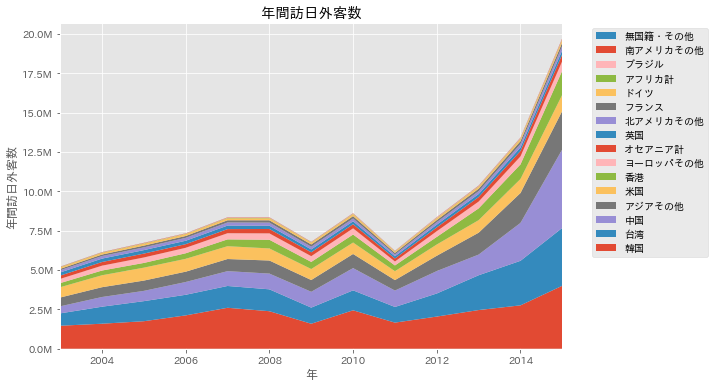

In [78]:
plt_stack('年', '年間訪日外客数', num_stacks)

### エリアチャート（割合）

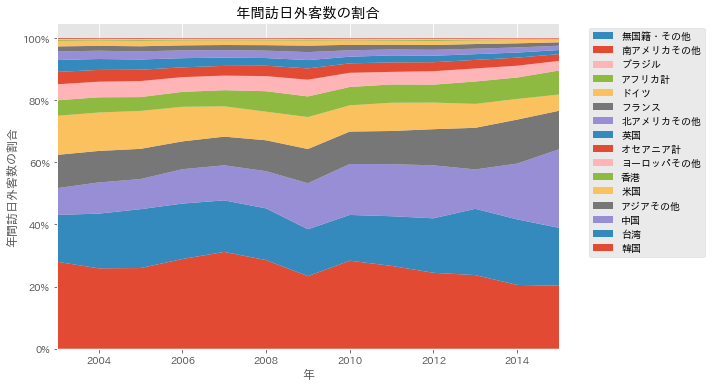

In [79]:
plt_stack('年', '年間訪日外客数の割合', ratio_stacks)

### 折れ線グラフ

In [80]:
def plt_line(x, y):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(1, 1, 1)
    plt.title(y)
    for country in sorted_countries:
        _df = tourists[tourists['国名']==country]
        plt.plot(_df[x], _df[y], label=country)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xlim(tourists[x].min(), tourists[x].max())
    plt.axhline(1, c='gray', ls=':')
    plt.legend(**legend_option1)
    if '成長率' in y:
        ax.yaxis.set_major_formatter(pformatter)
    else:
        ax.yaxis.set_major_formatter(formatter)

    plt.show()

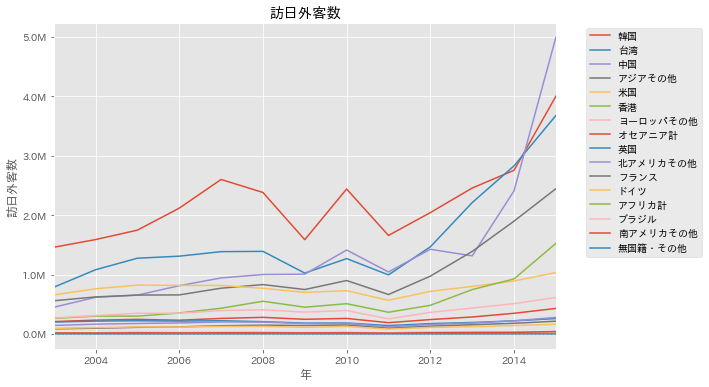

In [81]:
plt_line('年', '訪日外客数')

### ファンチャート

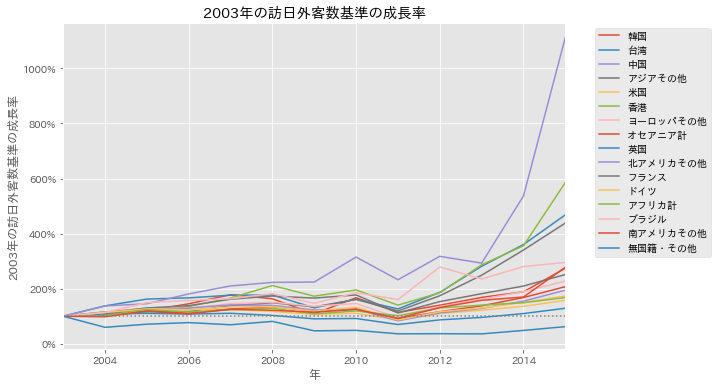

In [82]:
plt_line('年', growth)

### 積み上げ棒グラフ

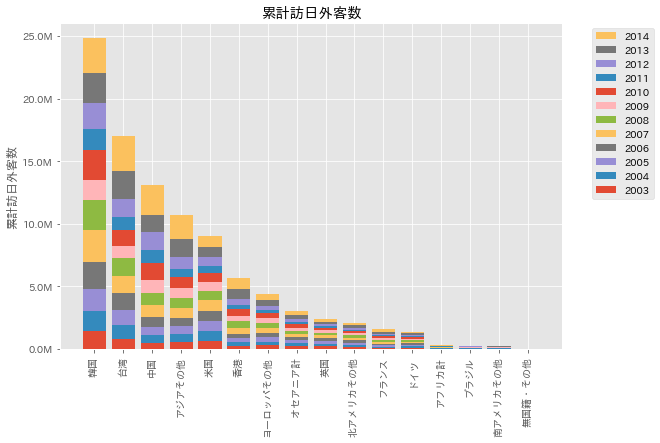

In [83]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)
y = '累計訪日外客数'
plt.title(y)
offset = 0
years = list(tourists_wide.columns[1:-1])
for year in years:
    plt.bar(tourists_wide['国名'], tourists_wide[year], bottom=offset, label=year)
    offset += tourists_wide[year]
handles, labels = ax.get_legend_handles_labels()
plt.xticks(rotation=90)
plt.ylabel(y)
ax.legend(**legend_option1, handles=handles[::-1], labels=labels[::-1])
ax.yaxis.set_major_formatter(formatter)
plt.show()

### 折れ線グラフとコネクテッド散布図（2重軸グラフ）

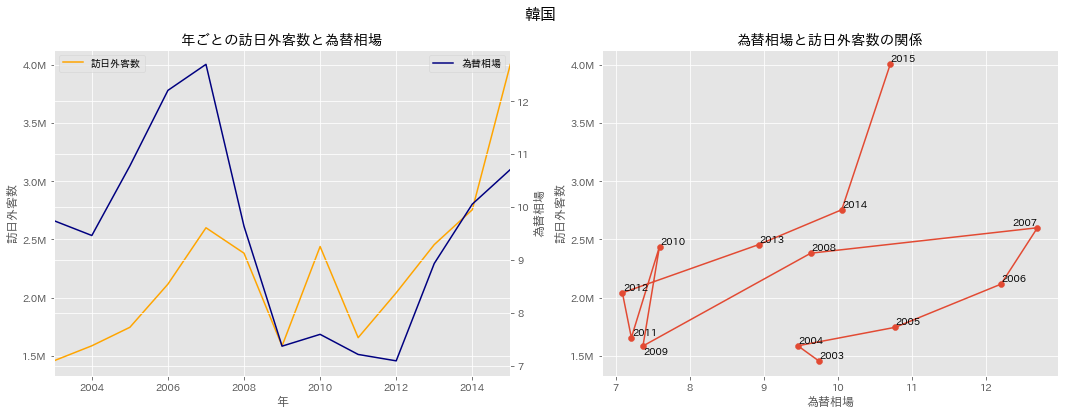

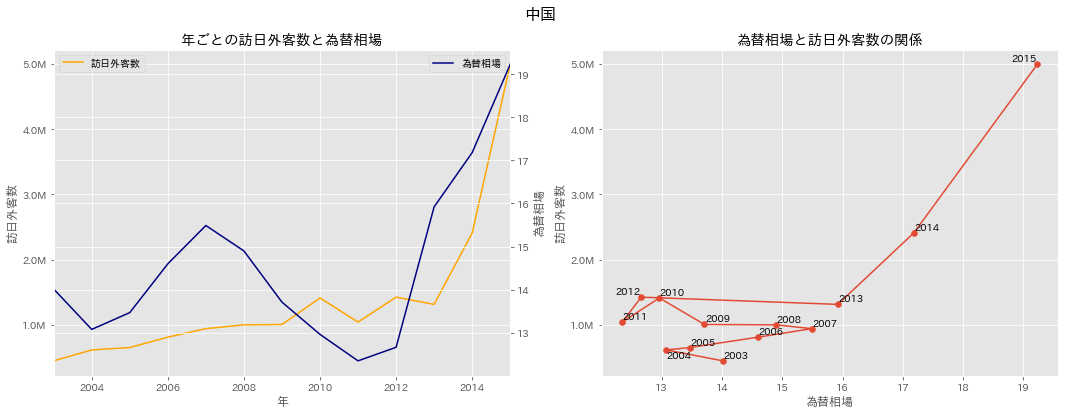

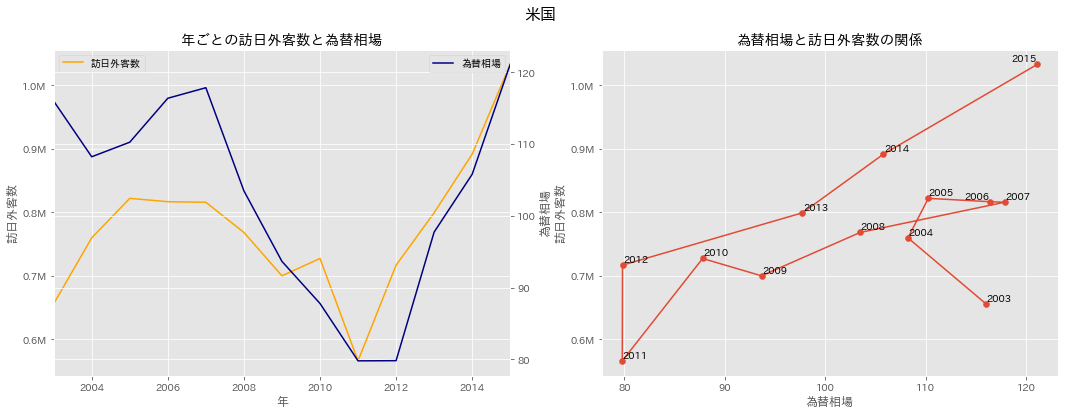

In [84]:
for country in tourists_exrate['国名'].unique():
    fig = plt.figure(figsize=(18, 6))
    fig.suptitle(country, fontsize=16)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title(f'年ごとの訪日外客数と為替相場')
    x = '年'
    y1 = '訪日外客数'
    y2 = '為替相場'
    _df = tourists_exrate[tourists_exrate['国名']==country]
    ax1.plot(_df[x], _df[y1], label=y1, color='orange')
    plt.ylabel(y1)
    ax1.set_xlabel(x)
    ax2 = ax1.twinx()
    ax2.plot(_df[x], _df[y2], label=y2, color='navy')
    plt.ylabel(y2)
    plt.xlim(tourists_exrate[x].min(), tourists_exrate[x].max())
    plt.xlabel(x)
    ax1.legend(loc='upper left')
    ax2.legend()
    ax1.yaxis.set_major_formatter(formatter)


    ax3 = fig.add_subplot(1, 2, 2)
    ax3.set_title('為替相場と訪日外客数の関係')
    plt.scatter(_df['為替相場'], _df['訪日外客数'])
    plt.plot(_df['為替相場'], _df['訪日外客数'])
    plt.xlabel(y2)
    plt.ylabel(y1)
    _x = list(_df['為替相場'])
    _y = list(_df['訪日外客数'])
    text = list(_df['年'])
    texts = [plt.text(_x[i], _y[i], text[i], ha='center', va='center') for i in range(len(_x))]
    adjust_text(texts)
    ax3.yaxis.set_major_formatter(formatter)
    plt.show()